In [147]:
import pandas as pd

df = pd.read_csv('Train_Data.csv')
print(df.shape)  # 3630 rows, 7 columns
print(df.head())

(3630, 7)
         age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900


In [148]:
age = df['age']
raw_sex = df['sex']         # categorical
bmi = df['bmi']
raw_smoker = df['smoker']   # categorical
raw_region = df['region']   # categorical
children = df['children']

In [149]:
# printing unique categorical values
print(f"sex --> {list(set(raw_sex))}")
print(f"smoker --> {list(set(raw_smoker))}")
print(f"region --> {list(set(raw_region))}")

sex --> ['male', 'female']
smoker --> ['yes', 'no']
region --> ['southwest', 'northeast', 'southeast', 'northwest']


In [150]:
# feature engineering on categorical values
proc_sex = []  # processed age
proc_smoker = []
proc_region = []

for i in range(len(age)):

    bag_sex = [0] * len(list(set(raw_sex)))
    if raw_sex[i] ==  'male': bag_sex[0] = 1
    elif raw_sex[i] == 'female': bag_sex[1] = 1
    proc_sex.append(bag_sex)

    bag_smoker = [0] * len(list(set(raw_smoker)))
    if raw_smoker[i] == 'yes': bag_smoker[0] = 1
    elif raw_smoker[i] == 'no': bag_smoker[1] = 1
    proc_smoker.append(bag_smoker)

    bag_region = [0] * len(list(set(raw_region)))
    if raw_region[i] == 'southwest': bag_region[0] = 1
    elif raw_region[i] == 'northeast': bag_region[1] = 1
    elif raw_region[i] == 'southeast': bag_region[2] = 1
    elif raw_region[i] == 'northwest': bag_region[3] = 1
    proc_region.append(bag_region)

print(len(proc_sex))
print(proc_sex[:10])
print(proc_smoker[:10])
print(proc_region[:5])

3630
[[1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [0, 1]]
[[0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
[[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 1, 0]]


In [151]:
# creating training dataset
train_x = []

for i in range(len(age)):
    temp = [
        age[i], proc_sex[i][0], proc_sex[i][1], bmi[i], children[i],
        proc_smoker[i][0], proc_smoker[i][1],
        proc_region[i][0], proc_region[i][1], proc_region[i][2], proc_region[i][3]
    ]
    train_x.append(temp)

In [152]:
import numpy as np

train_x = np.array(train_x)

train_y = df['charges']
train_y = np.array(train_y)

print(train_x.shape, train_y.shape)
print(train_x[:2])
print(train_y[:2])

(3630, 11) (3630,)
[[21.          1.          0.         25.745       2.          0.
   1.          0.          1.          0.          0.        ]
 [36.976978    0.          1.         25.74416485  3.          1.
   0.          0.          0.          1.          0.        ]]
[ 3279.86855    21454.49423864]


In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(64, input_shape=[11], activation='relu'),
    # layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    # layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    
    layers.Dense(1),
])

model.compile(
    loss='mae',
    optimizer='adam'
)

In [154]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=30,
    patience=20,
    restore_best_weights=True,
)

In [155]:
history = model.fit(
    train_x, train_y,
    validation_split=0.1,
    epochs=300,
    callbacks=[early_stopping],
    verbose=0
)

print("loss :", model.evaluate(train_x, train_y))

114/114 [==============================] - 0s 2ms/step - loss: 2209.3831
loss : 2209.383056640625


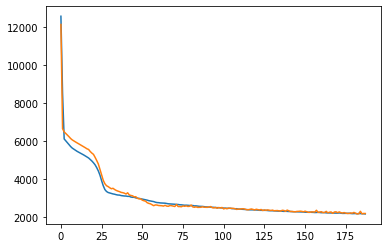

In [156]:
import matplotlib.pyplot as plt

plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.show()

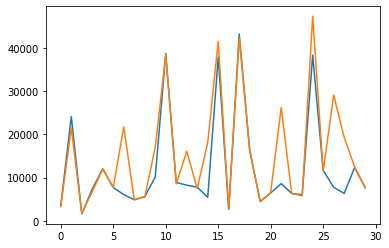

In [157]:
# checking how good the model fits on training dataset

train_predictions = model.predict(train_x)

plt.plot(train_predictions[:30])
plt.plot(train_y[:30])
plt.show()

In [158]:
# for i in range(len(train_predictions)):
for i in range(20):
    print(f"{int(train_y[i]//1)} predicted --> {int(train_predictions[i][0]//1)},\t\tdifference --> { ( int(train_predictions[i][0]//1) - int(train_y[i]//1) ) }")

3279 predicted --> 3575,		difference --> 296
21454 predicted --> 24093,		difference --> 2639
1720 predicted --> 1619,		difference --> -101
6801 predicted --> 7389,		difference --> 588
11946 predicted --> 12045,		difference --> 99
7742 predicted --> 7716,		difference --> -26
21736 predicted --> 6098,		difference --> -15638
4916 predicted --> 4893,		difference --> -23
5515 predicted --> 5620,		difference --> 105
17009 predicted --> 10131,		difference --> -6878
38433 predicted --> 38664,		difference --> 231
8549 predicted --> 8889,		difference --> 340
16099 predicted --> 8258,		difference --> -7841
7492 predicted --> 7795,		difference --> 303
18091 predicted --> 5466,		difference --> -12625
41501 predicted --> 37875,		difference --> -3626
2661 predicted --> 2673,		difference --> 12
42211 predicted --> 43212,		difference --> 1001
16455 predicted --> 16205,		difference --> -250
4433 predicted --> 4488,		difference --> 55


In [159]:
df = pd.read_csv('Test_Data.csv')

print(df.shape)  # 492 rows, 6 columns
print(df.head())

(492, 6)
         age     sex        bmi smoker     region  children
0  40.000000    male  29.900000     no  southwest         2
1  47.000000    male  32.300000     no  southwest         1
2  54.000000  female  28.880000     no  northeast         2
3  37.000000    male  30.568094     no  northeast         3
4  59.130049    male  33.132854    yes  northeast         4


In [160]:
age = df['age']
raw_sex = df['sex']         # categorical
bmi = df['bmi']
raw_smoker = df['smoker']   # categorical
raw_region = df['region']   # categorical
children = df['children']

# printing unique categorical values
print(f"sex --> {list(set(raw_sex))}")
print(f"smoker --> {list(set(raw_smoker))}")
print(f"region --> {list(set(raw_region))}")

sex --> ['male', 'female']
smoker --> ['yes', 'no']
region --> ['southwest', 'northeast', 'southeast', 'northwest']


In [161]:
# feature engineering on categorical values
proc_sex = []  # processed age
proc_smoker = []
proc_region = []

for i in range(len(age)):

    bag_sex = [0] * len(list(set(raw_sex)))
    if raw_sex[i] ==  'male': bag_sex[0] = 1
    elif raw_sex[i] == 'female': bag_sex[1] = 1
    proc_sex.append(bag_sex)

    bag_smoker = [0] * len(list(set(raw_smoker)))
    if raw_smoker[i] == 'yes': bag_smoker[0] = 1
    elif raw_smoker[i] == 'no': bag_smoker[1] = 1
    proc_smoker.append(bag_smoker)

    bag_region = [0] * len(list(set(raw_region)))
    if raw_region[i] == 'southwest': bag_region[0] = 1
    elif raw_region[i] == 'northeast': bag_region[1] = 1
    elif raw_region[i] == 'southeast': bag_region[2] = 1
    elif raw_region[i] == 'northwest': bag_region[3] = 1
    proc_region.append(bag_region)

print(len(proc_sex))
print(proc_sex[:10])
print(proc_smoker[:10])
print(proc_region[:5])

492
[[1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1]]
[[0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
[[1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]]


In [162]:
# creating testing dataset
test_x = []

for i in range(len(age)):
    temp = [
        age[i], proc_sex[i][0], proc_sex[i][1], bmi[i], children[i],
        proc_smoker[i][0], proc_smoker[i][1],
        proc_region[i][0], proc_region[i][1], proc_region[i][2], proc_region[i][3]
    ]
    test_x.append(temp)

In [163]:
import numpy as np

test_x = np.array(test_x)

print(test_x.shape)
print(test_x[:2])

(492, 11)
[[40.   1.   0.  29.9  2.   0.   1.   1.   0.   0.   0. ]
 [47.   1.   0.  32.3  1.   0.   1.   1.   0.   0.   0. ]]


In [192]:
predictions = model.predict(test_x)

print("AGE\tSEX\tBMI\tSMOKER\t REGION\t\t  CHARGES")
# for i in range(len(predictions)):
for i in range(20):
    print(f"{df['age'][i]//1}\t{df['sex'][i]}\t{df['bmi'][i]//1}\t{df['smoker'][i]}\t{df['region'][i]}", end='\t')
    print(f"predicted --> $ {int(predictions[i][0]//1)}")

AGE	SEX	BMI	SMOKER	 REGION		  CHARGES
40.0	male	29.0	no	southwest	predicted --> $ 6693
47.0	male	32.0	no	southwest	predicted --> $ 8117
54.0	female	28.0	no	northeast	predicted --> $ 12011
37.0	male	30.0	no	northeast	predicted --> $ 7386
59.0	male	33.0	yes	northeast	predicted --> $ 36045
43.0	female	34.0	no	southwest	predicted --> $ 8523
49.0	female	25.0	no	northwest	predicted --> $ 11438
31.0	male	29.0	no	northeast	predicted --> $ 8167
19.0	female	31.0	no	northwest	predicted --> $ 2588
59.0	female	29.0	no	southeast	predicted --> $ 14158
26.0	male	29.0	no	northeast	predicted --> $ 3078
32.0	male	27.0	no	northwest	predicted --> $ 4472
38.0	male	29.0	no	southwest	predicted --> $ 7966
25.0	male	25.0	no	southwest	predicted --> $ 5414
25.0	female	30.0	no	southwest	predicted --> $ 2593
37.0	male	19.0	no	northwest	predicted --> $ 6494
30.0	female	19.0	no	northwest	predicted --> $ 5555
59.0	female	32.0	no	northeast	predicted --> $ 14482
63.0	female	27.0	no	northeast	predicted --> $ 15594
44.0	f